<a href="https://colab.research.google.com/github/NekoFang/ISYS2001/blob/main/James.Duong_weatherwise_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [8]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install pyinputplus
!pip install matplotlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyinputplus: filename=pyinputplus-0.2.12-py3-none-any.whl size=11348 sha256=aa42de133e56bad5941c90beb3308fa4058a6f6d553b11ac7f4d4a42bc5bbc51
  Stored in directory: /root/.cache/pip/wheels/a3/6b/89/3bec14288af8e0729d088fb41a785e583d49e772f2529c7676
  Created wheel for pysimplevalidate: filename=pysimplevalidate-0.2.12-py3-none-any.whl size=16225 sha256=92a4738ccf94846af62dc20bbff945064cff037d5b933c47a2f4c39e9973fa4d
  Stored in directory: /root/.cache/pip/wheels/fc/40/7a/4d3b2dc2e80b4b3bbda89eec94fcefd6c8bd1101cc7bb89554
  Created wheel for stdiomask: filename=stdiomask

In [ ]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

## 📦 Setup and Configuration
Import required packages and setup environment.

In [ ]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
# ✅ Import after installing (if needed)


# Add any other setup code here

## 🌤️ Weather Data Functions

In [ ]:
# Define get_weather_data() function here
def get_weather_data(location, forecast_days=5):
    """
    Retrieve weather data for a specified location.

    Args:
        location (str): City or location name
        forecast_days (int): Number of days to forecast (1-5)

    Returns:
        dict: Weather data including current conditions and forecast
    """
    pass

## 📊 Visualisation Functions

In [ ]:
# Define create_temperature_visualisation() and create_precipitation_visualisation() here
def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of temperature data.

    Args:
        weather_data (dict): The processed weather data
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib figure object
        Otherwise, displays the visualisation in the notebook
    """
    pass


Enter location (e.g., Perth): Perth


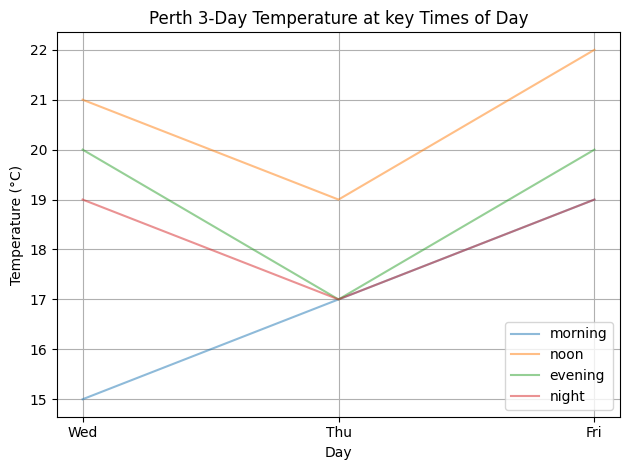

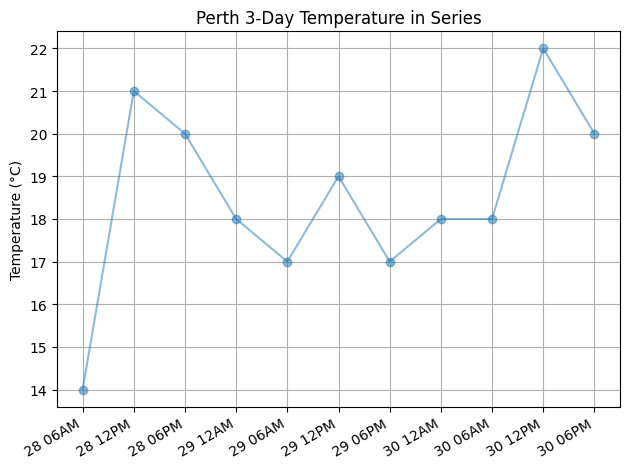

In [3]:
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

def fetch_weather_data(location):
    """Fetch JSON weather data for the given location from wttr.in."""
    url = f"https://wttr.in/{location}?format=j1"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        return response.json()
    except requests.RequestException as e:
        print(f"[Error] Could not fetch weather data: {e}")
        return None

def extract_temperatures(data, days=3):
    """Get morning, noon, evening, night temps for up to `days` days."""
    time_map = {'morning':'900', 'noon':'1200', 'evening':'1800', 'night':'2100'}
    dates, temps = [], {k:[] for k in time_map}
    for day in data.get('weather', [])[:days]:
        dates.append(datetime.strptime(day['date'], "%Y-%m-%d").date())
        hourly = day.get('hourly', [])
        for label, code in time_map.items():
            entry = next((h for h in hourly if h['time']==code), None)
            temps[label].append(int(entry['tempC']) if entry else None)
    return dates, temps

def plot_by_day(dates, temps, location):
    """Plot the 3-day trend with weekday labels."""
    labels = [d.strftime("%a") for d in dates]
    plt.figure()
    for period, vals in temps.items():
        plt.plot(labels, vals, label=period, alpha=0.5)
    plt.title(f"{location} 3-Day Temperature at key Times of Day")
    plt.xlabel("Day")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def extract_sequential(data, days=3):
    """Build a flat time series at 6 AM, 12 PM, 6 PM, 12 AM across `days` days."""
    time_codes = ['600','1200','1800','0']
    datetimes, temps = [], []
    weather_days = data.get('weather', [])[:days]
    for i, day in enumerate(weather_days):
        for code in time_codes:
            if code == '0':  # midnight, take from next day
                if i+1 < len(weather_days):
                    next_day = weather_days[i+1]
                    dt = datetime.strptime(f"{next_day['date']} 0000", "%Y-%m-%d %H%M")
                    entry = next((h for h in next_day['hourly'] if h['time']=='0'), None)
                else:
                    continue
            else:
                dt = datetime.strptime(f"{day['date']} {code.zfill(4)}", "%Y-%m-%d %H%M")
                entry = next((h for h in day['hourly'] if h['time']==code), None)
            if entry:
                datetimes.append(dt)
                temps.append(int(entry['tempC']))
    return datetimes, temps

def plot_sequential(times, temps, location):
    """Plot the sequential 3-day 6 AM→12 PM→6 PM→12 AM line."""
    fig, ax = plt.subplots()
    ax.plot(times, temps, marker='o', alpha=0.5)
    ax.set_title(f"{location} 3-Day Temperature in Series")
    ax.set_ylabel("Temperature (°C)")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %I%p'))
    ax.set_xticks(times)
    fig.autofmt_xdate()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    loc = input("Enter location (e.g., Perth): ")
    data = fetch_weather_data(loc)
    if not data:
        return

    # 1) By-day 3-day trend
    dates, temps_day = extract_temperatures(data, days=3)
    plot_by_day(dates, temps_day, loc)

    # 2) Sequential 3-day trend
    times, temps_seq = extract_sequential(data, days=3)
    plot_sequential(times, temps_seq, loc)

if __name__ == "__main__":
    main()


In [ ]:

def create_precipitation_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of precipitation data.

    Args:
        weather_data (dict): The processed weather data
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib figure object
        Otherwise, displays the visualisation in the notebook
    """
    pass

Enter location (e.g., Perth): perth


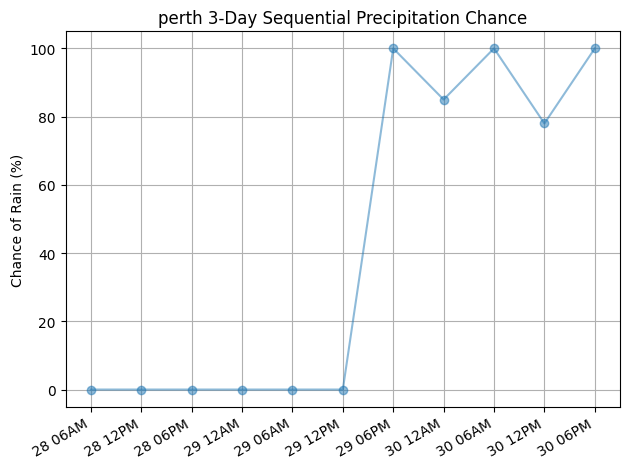

In [15]:
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

def fetch_weather_data(location):
    """Fetch JSON weather data for the given location from wttr.in."""
    url = f"https://wttr.in/{location}?format=j1"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        return response.json()
    except requests.RequestException as e:
        print(f"[Error] Could not fetch weather data: {e}")
        return None

def extract_sequential_precipitation(data, days=3):
    """
    Build a sequential time series of precipitation chance at 6 AM, 12 PM, 6 PM, and midnight
    across `days` days.
    """
    time_codes = ['600', '1200', '1800', '0']
    datetimes = []
    precip_chances = []
    weather_days = data.get('weather', [])[:days]

    for i, day in enumerate(weather_days):
        for code in time_codes:
            if code == '0':  # midnight belongs to the next day
                if i + 1 < len(weather_days):
                    next_day = weather_days[i + 1]
                    dt = datetime.strptime(f"{next_day['date']} 0000", "%Y-%m-%d %H%M")
                    entry = next((h for h in next_day['hourly'] if h.get('time') == '0'), None)
                else:
                    continue
            else:
                dt = datetime.strptime(f"{day['date']} {code.zfill(4)}", "%Y-%m-%d %H%M")
                entry = next((h for h in day['hourly'] if h.get('time') == code), None)
            if entry:
                datetimes.append(dt)
                # Extract precipitation chance (chanceofrain)
                precip_chances.append(int(entry.get('chanceofrain', 0)))

    return datetimes, precip_chances

def plot_sequential_precipitation(location, days=3):
    data = fetch_weather_data(location)
    if not data:
        return

    times, precip = extract_sequential_precipitation(data, days)

    fig, ax = plt.subplots()
    ax.plot(times, precip, marker='o', alpha=0.5)
    ax.set_title(f"{location} {days}-Day Sequential Precipitation Chance")
    ax.set_ylabel("Chance of Rain (%)")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %I%p'))
    ax.set_xticks(times)
    fig.autofmt_xdate()
    ax.grid(True)
    plt.tight_layout()
    plt.show()



def main():
    loc = input("Enter location (e.g., Perth): ")
    plot_sequential_precipitation(loc)


if __name__ == "__main__":
    main()

## 🤖 Natural Language Processing

In [ ]:
# Define parse_weather_question() and generate_weather_response() here
def parse_weather_question(question):
    """
    Parse a natural language weather question.

    Args:
        question (str): User's weather-related question

    Returns:
        dict: Extracted information including location, time period, and weather attribute
    """
    pass

## 🧭 User Interface

In [ ]:
# Define menu functions using pyinputplus or ipywidgets here

## 🧩 Main Application Logic

In [ ]:
# Tie everything together here
def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question.

    Args:
        parsed_question (dict): Parsed question data
        weather_data (dict): Weather data

    Returns:
        str: Natural language response
    """
    pass

## 🧪 Testing and Examples

In [1]:
import requests
import pyinputplus as pyip
from datetime import datetime, timedelta

def convert_observation_time_manual_perth(observation_time_utc_str):
    """
    Converts UTC observation_time string to AWST (UTC+8) manually.
    """
    try:
        obs_time = datetime.strptime(observation_time_utc_str, "%I:%M %p").time()
        obs_datetime_utc = datetime.combine(datetime.utcnow().date(), obs_time)
        obs_awst = obs_datetime_utc + timedelta(hours=8)
        return obs_awst.strftime("%I:%M %p (AWST)")
    except Exception as e:
        return f"[Time Conversion Error: {e}]"

def get_weather_data(location):
    """
    Fetches weather data from wttr.in for the given location.
    """
    url = f"https://wttr.in/{location}?format=j1"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        return response.json()
    except requests.RequestException as e:
        print(f"[Error] Could not fetch weather data: {e}")
        return None

def display_weather(location):
    """
    Displays current weather and a 5-day forecast for the location.
    """
    data = get_weather_data(location)
    if not data:
        return

    # Extract location info
    area = data['nearest_area'][0]['areaName'][0]['value']
    region = data['nearest_area'][0]['region'][0]['value']
    country = data['nearest_area'][0]['country'][0]['value']

    print(f"\nWeather for: {area}, {region}, {country}")
    print("-" * 50)

    current = data['current_condition'][0]
    observation_time = current['observation_time']
    local_obs_time = convert_observation_time_manual_perth(observation_time)

    print(f"Current Temp: {current['temp_C']}°C")
    print(f"Condition: {current['weatherDesc'][0]['value']}")
    print(f"Data last updated at: {local_obs_time}\n")

    # Forecast
    days = data['weather'][:5]
    for day in days:
        date = day['date']
        maxtemp = day['maxtempC']
        mintemp = day['mintempC']
        rain_chance = day['hourly'][4]['chanceofrain']
        print(f"Date: {date}")
        print(f"High: {maxtemp}°C, Low: {mintemp}°C, Rain: {rain_chance}%\n")

# --- Natural Language Interface ---

def parse_weather_question(question):
    """
    Parses a weather question to extract intent and location.
    """
    question = question.lower()

    if "rain" in question:
        intent = "rain"
    elif "temperature" in question or "hot" in question or "cold" in question:
        intent = "temperature"
    elif "forecast" in question or "weather" in question:
        intent = "forecast"
    else:
        intent = "unknown"

    import re
    match = re.search(r"in ([a-zA-Z\s]+)", question)
    location = match.group(1).strip() if match else "unknown"

    return {"intent": intent, "location": location}

def handle_natural_language_query():
    """
    Handles user input in natural language and routes it.
    """
    question = input("Ask your weather-related question:\n")
    parsed = parse_weather_question(question)

    print("\n--- Interpreted Query ---")
    print(f"Intent   : {parsed['intent']}")
    print(f"Location : {parsed['location']}")

    if parsed["location"] == "unknown":
        print("❌ Could not detect location. Please include 'in <location>'.")
    elif parsed["intent"] == "forecast":
        display_weather(parsed["location"])
    elif parsed["intent"] == "rain":
        print(f"✅ [Placeholder] Would show precipitation chart for {parsed['location']}")
        # TODO: call plot_precipitation_chance(parsed['location'])
    elif parsed["intent"] == "temperature":
        print(f"✅ [Placeholder] Would show temperature trend for {parsed['location']}")
        # TODO: call plot_temperature_trend(parsed['location'])
    else:
        print("❌ Could not understand the type of weather info requested.")

# --- Main Menu ---

def main():
    print("🌤️ Welcome to Weather Advisor!")

    while True:
        choice = pyip.inputMenu(
            ["View Forecast", "Ask a Question", "Exit"],
            prompt="\nWhat would you like to do?\n",
            numbered=True
        )

        if choice == "View Forecast":
            location = input("Enter a location: ")
            display_weather(location)

        elif choice == "Ask a Question":
            handle_natural_language_query()

        elif choice == "Exit":
            print("Goodbye! Stay safe out there! ☔")
            break

if __name__ == "__main__":
    main()


## 🗂️ AI Prompting/Change Log (Optional)
V1. Capable of gathering weather data from wttr.in with data input

v2. Added looping process without needing to restart code

v3. Added displaying geograhical location and the time at which the data was gathered

v4. Changed from universal time to AWST to make it more accessible

v5. Added temperature visualisation for specific time trends

v6. Changed from 5 to 3 day spread, x label changed to only display the day e.g. (28th), and made lines slightly transparent in order to view overlapping data better

v7. Added temperature visualisation for sequential/continuous time

v8. Changed so that the separated visualisations are now shown together after inputting location

v9. Added precipitation visualisation for sequential/continuous time

v10. Added elaborate menu as well as natural language parsing

v11. Changed main code to include temperature visualisations

v12. Changed main code to include precipitation visualisations

v13. Changed intent qualifiers to include more words, and added a back input from any menu point

# 💻Current Working Code

🌤️ Welcome to Weather Advisor!

What would you like to do?
1. View Forecast
2. Ask a Question
3. Exit
2

Ask a weather-related question (or type 'back' to return to menu):
do i need an umbrella in perth

--- Interpreted Query ---
Intent   : rain
Location : perth


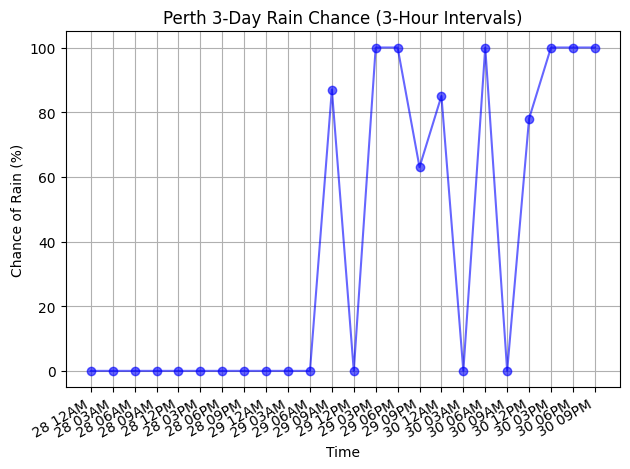

KeyboardInterrupt: Interrupted by user

In [23]:
import requests
import pyinputplus as pyip
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

def convert_observation_time_manual_perth(observation_time_utc_str):
    """
    Converts UTC observation_time string to AWST (UTC+8) manually.
    """
    try:
        obs_time = datetime.strptime(observation_time_utc_str, "%I:%M %p").time()
        obs_datetime_utc = datetime.combine(datetime.utcnow().date(), obs_time)
        obs_awst = obs_datetime_utc + timedelta(hours=8)
        return obs_awst.strftime("%I:%M %p (AWST)")
    except Exception as e:
        return f"[Time Conversion Error: {e}]"

def get_weather_data(location):
    """
    Fetches weather data from wttr.in for the given location.
    """
    url = f"https://wttr.in/{location}?format=j1"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        return response.json()
    except requests.RequestException as e:
        print(f"[Error] Could not fetch weather data: {e}")
        return None

def display_weather(location):
    """
    Displays current weather and a 5-day forecast for the location.
    """
    data = get_weather_data(location)
    if not data:
        return

    # Extract location info
    area = data['nearest_area'][0]['areaName'][0]['value']
    region = data['nearest_area'][0]['region'][0]['value']
    country = data['nearest_area'][0]['country'][0]['value']

    print(f"\nWeather for: {area}, {region}, {country}")
    print("-" * 50)

    current = data['current_condition'][0]
    observation_time = current['observation_time']
    local_obs_time = convert_observation_time_manual_perth(observation_time)

    print(f"Current Temp: {current['temp_C']}°C")
    print(f"Condition: {current['weatherDesc'][0]['value']}")
    print(f"Data last updated at: {local_obs_time}\n")

    # Forecast
    days = data['weather'][:5]
    for day in days:
        date = day['date']
        maxtemp = day['maxtempC']
        mintemp = day['mintempC']
        rain_chance = day['hourly'][4]['chanceofrain']
        print(f"Date: {date}")
        print(f"High: {maxtemp}°C, Low: {mintemp}°C, Rain: {rain_chance}%\n")

# --- Temperature Visualisations3 ---

def extract_temperatures(data, days=3):
    time_map = {'morning':'900', 'noon':'1200', 'evening':'1800', 'night':'2100'}
    dates, temps = [], {k:[] for k in time_map}
    for day in data.get('weather', [])[:days]:
        dates.append(datetime.strptime(day['date'], "%Y-%m-%d").date())
        hourly = day.get('hourly', [])
        for label, code in time_map.items():
            entry = next((h for h in hourly if h['time']==code), None)
            temps[label].append(int(entry['tempC']) if entry else None)
    return dates, temps

def plot_by_day(dates, temps, location):
    labels = [d.strftime("%a") for d in dates]
    plt.figure()
    for period, vals in temps.items():
        plt.plot(labels, vals, label=period, alpha=0.5)
    plt.title(f"{location} 3-Day Temperature at key Times of Day")
    plt.xlabel("Day")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def extract_sequential(data, days=3):
    time_codes = ['600','1200','1800','0']
    datetimes, temps = [], []
    weather_days = data.get('weather', [])[:days]
    for i, day in enumerate(weather_days):
        for code in time_codes:
            if code == '0':
                if i+1 < len(weather_days):
                    next_day = weather_days[i+1]
                    dt = datetime.strptime(f"{next_day['date']} 0000", "%Y-%m-%d %H%M")
                    entry = next((h for h in next_day['hourly'] if h['time']=='0'), None)
                else:
                    continue
            else:
                dt = datetime.strptime(f"{day['date']} {code.zfill(4)}", "%Y-%m-%d %H%M")
                entry = next((h for h in day['hourly'] if h['time']==code), None)
            if entry:
                datetimes.append(dt)
                temps.append(int(entry['tempC']))
    return datetimes, temps

def plot_sequential(times, temps, location):
    fig, ax = plt.subplots()
    ax.plot(times, temps, marker='o', alpha=0.5)
    ax.set_title(f"{location} 3-Day Temperature in Series")
    ax.set_ylabel("Temperature (°C)")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %I%p'))
    ax.set_xticks(times)
    fig.autofmt_xdate()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

def show_temperature_charts(location):
    """
    Calls both temperature chart types using fetched weather data.
    """
    data = get_weather_data(location)
    if not data:
        print("[Error] Could not load data for temperature chart.")
        return

    dates, temps_day = extract_temperatures(data, days=3)
    plot_by_day(dates, temps_day, location)

    times, temps_seq = extract_sequential(data, days=3)
    plot_sequential(times, temps_seq, location)

# --- Precipitation Visualisation ---
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

def extract_precipitation_timeseries(data, days=3):
    """
    Builds a full 3-day time series of rain chance at 3-hour intervals.
    """
    datetimes = []
    rain_chances = []

    weather_days = data.get('weather', [])[:days]

    for day in weather_days:
        date = day['date']
        for hour_entry in day['hourly']:
            time_code = hour_entry['time'].zfill(4)  # e.g., '300' → '0300'
            dt = datetime.strptime(f"{date} {time_code}", "%Y-%m-%d %H%M")
            datetimes.append(dt)
            rain_chances.append(int(hour_entry.get('chanceofrain', 0)))

    return datetimes, rain_chances

def plot_precipitation_timeseries(times, rain_chances, location):
    """
    Plots a full 3-day time series of precipitation chance.
    """
    fig, ax = plt.subplots()
    ax.plot(times, rain_chances, marker='o', color='blue', alpha=0.6)
    ax.set_title(f"{location.title()} 3-Day Rain Chance (3-Hour Intervals)")
    ax.set_ylabel("Chance of Rain (%)")
    ax.set_xlabel("Time")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %I%p'))
    ax.set_xticks(times)
    fig.autofmt_xdate()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

def show_precipitation_chart(location, days=3):
    """
    Fetches data and shows precipitation time series chart for the given location.
    """
    data = get_weather_data(location)
    if not data:
        print("[Error] Could not load weather data.")
        return

    times, rain_chances = extract_precipitation_timeseries(data, days)
    plot_precipitation_timeseries(times, rain_chances, location)


# --- Natural Language Interface ---

def parse_weather_question(question):
    """
    Parses a weather question to extract intent and location.
    """
    question = question.lower()

    if "rain" in question or "umbrella" in question or "wet" in question:
        intent = "rain"
    elif "temperature" in question or "hot" in question or "cold" in question:
        intent = "temperature"
    elif "forecast" in question or "weather" in question:
        intent = "forecast"
    else:
        intent = "unknown"

    import re
    match = re.search(r"in ([a-zA-Z\s]+)", question)
    location = match.group(1).strip() if match else "unknown"

    return {"intent": intent, "location": location}

def handle_natural_language_query():
    """
    Handles natural language weather questions and routes to the correct function.
    """
    while True:
        question = input("\nAsk a weather-related question (or type 'back' to return to menu):\n").strip().lower()

        if question in ["back", "menu", "return"]:
            print("🔁 Returning to main menu.")
            return
        elif question in ["exit", "quit"]:
            print("👋 Exiting Weather Advisor. Stay safe!")
            exit()

        parsed = parse_weather_question(question)

        print("\n--- Interpreted Query ---")
        print(f"Intent   : {parsed['intent']}")
        print(f"Location : {parsed['location']}")

        if parsed["location"] == "unknown":
            print("❌ Could not detect location. Please include 'in <location>'. Try again or type 'back'.")
        elif parsed["intent"] == "forecast":
            display_weather(parsed["location"])
        elif parsed["intent"] == "rain":
            show_precipitation_chart(parsed["location"])
        elif parsed["intent"] == "temperature":
            show_temperature_charts(parsed["location"])
        else:
            print("❌ Sorry, I couldn't understand what you're asking. Try rephrasing or type 'back'.")


# --- Main Menu ---

def main():
    print("🌤️ Welcome to Weather Advisor!")

    while True:
        choice = pyip.inputMenu(
            ["View Forecast", "Ask a Question", "Exit"],
            prompt="\nWhat would you like to do?\n",
            numbered=True
        )

        if choice == "View Forecast":
            location = input("Enter a location: ")
            display_weather(location)

        elif choice == "Ask a Question":
            handle_natural_language_query()

        elif choice == "Exit":
            print("Goodbye! Stay safe out there! ☔")
            break

if __name__ == "__main__":
    main()